In [1]:
import numpy as np
import matplotlib.pyplot as plt



In [2]:
class PayoffDiagram:
    def __init__(self, S_min=0, S_max=200, steps=500):
        self.S = np.linspace(S_min, S_max, steps)

        self.positions = []
    
    def add_option(self, kind, strike, premium, quantity=1):
        self.positions.append({
            'type': kind.lower(),
            'K': strike,
            'prem': premium,
            'q': quantity
        })
    
    def add_stock(self, quantity=1, cost=0):
        self.positions.append({
            'type': 'stock',
            'cost': cost,
            'q': quantity
        })
    def total_payoff(self):
        P = np.zeros_like(self.S)
        for pos in self.positions:
            q = pos['q']
            if pos['type'] == 'call':
                payoff = np.maximum(self.S - pos['K'], 0) - pos['prem']
            elif pos['type'] == 'put':
                payoff = np.maximum(pos['K'] - self.S, 0) - pos['prem']
            else:  # stock
                payoff = self.S - pos['cost']
            P += q * payoff
        return P

    def plot(self, title="Option Payoff Diagram"):
        P = self.total_payoff()
        plt.figure(figsize=(8, 5))
        plt.plot(self.S, P, lw=2, label="Strategy P/L")
        plt.axhline(0, color='black', ls='--', lw=1)
        plt.xlabel("Underlying Price at Expiration")
        plt.ylabel("Profit / Loss")
        plt.title(title)
        plt.legend()
        plt.tight_layout()
        plt.show()


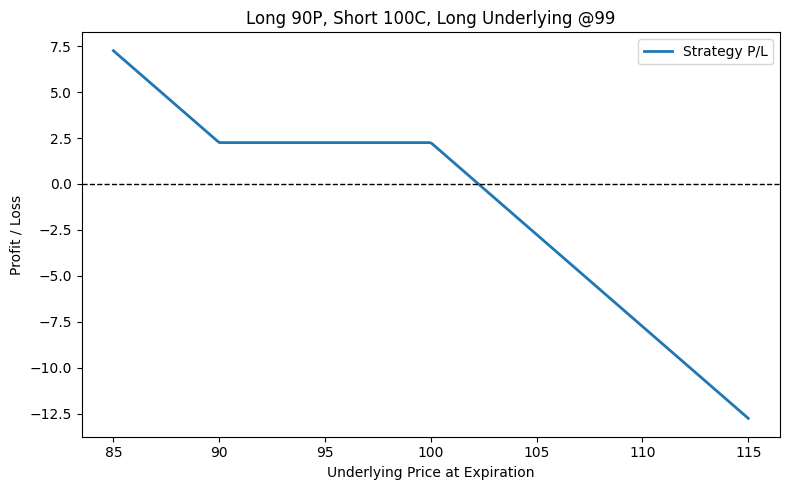

In [3]:
diag = PayoffDiagram(S_min=85, S_max=115, steps=300)

diag.add_option('put',    strike=90,  premium=0.45, quantity= 1)   # long 90 put
diag.add_option('call',   strike=100, premium=2.70, quantity=-1)   # short 100 call                     # long 1 share @99

diag.plot("Long 90P, Short 100C, Long Underlying @99")


In [4]:
# class to calculate the expected payoff of a stock (or any payoff function) over n possible states

class StockPayoffExpectation:
    def __init__(self, states, probabilities, payoff_fn=None):
        if len(states) != len(probabilities):
            raise ValueError("Number of states and probabilities must match.")
        if not abs(sum(probabilities) - 1) < 1e-8:
            raise ValueError("Probabilities must sum to 1.")
        if any(p < 0 for p in probabilities):
            raise ValueError("Probabilities must be non-negative.")
        
        self.states = states
        self.probabilities = probabilities
        self.payoff_fn = payoff_fn if payoff_fn is not None else (lambda s: s)

    def expectation(self):

        return sum(self.payoff_fn(s) * p for s, p in zip(self.states, self.probabilities))

    def add_state(self, state, probability):
        if probability < 0:
            raise ValueError("Probability must be non-negative.")
        self.states.append(state)
        self.probabilities.append(probability)
        total = sum(self.probabilities)
        if total == 0:
            raise ValueError("Total probability is zero after adding.")
        self.probabilities = [p / total for p in self.probabilities]

    def summary(self):
        print("State\tProbability\tPayoff")
        for s, p in zip(self.states, self.probabilities):
            print(f"{s}\t{p:.4f}\t\t{self.payoff_fn(s):.4f}")
        print(f"\nExpected Payoff: {self.expectation():.4f}")

states = [90, 100, 110, 120]

probabilities = [0.1, 0.4, 0.3, 0.2]

strike = 100
call_payoff = lambda price: max(price - strike, 0)

exp_calc = StockPayoffExpectation(states, probabilities, payoff_fn=call_payoff)

exp_calc.summary()

print("Computed Expected Payoff:", exp_calc.expectation())


State	Probability	Payoff
90	0.1000		0.0000
100	0.4000		0.0000
110	0.3000		10.0000
120	0.2000		20.0000

Expected Payoff: 7.0000
Computed Expected Payoff: 7.0
